In [125]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import sys
import csv

In [138]:
# === Importer data ===

my_path = "/home/happy/Documents/CPGRBF_slalom_logs/noise_exploration/"

init_set_nums = 4
last_set_nums = 5
set_nums = 1

for i in range(init_set_nums,last_set_nums):
  globals()[f"filename_set4_{i}"] = my_path+'flexbody_chaotic-noise_0.3-amp_decay-set4_mi0.12_ep350/jobs_'+str(i)+'/RL_log.txt'
  globals()[f"filename_normal_{i}"] = my_path+'flexbody_chaotic-noise_0.3-amp-set8_mi0.12_ep350/jobs_'+str(i)+'/RL_log.txt'
#   globals()[f"filename_normal_{i}"] = my_path+'flexbody_normal-noise_mi0.12_ep350/jobs_'+str(i)+'/RL_log.txt'



for i in range(init_set_nums,last_set_nums):
  globals()[f"exists_set4_{i}"] = os.path.isfile(f"filename_set4_{i}")
  globals()[f"exists_normal_{i}"] = os.path.isfile(f"filename_normal_{i}")


# if not exists_set4_1 and exists_normal_1:
#     print("Files does not exists")
#     exit()


for i in range(init_set_nums,last_set_nums):
  globals()[f"tel_set4_{i}"] = pd.read_csv(globals()[f"filename_set4_{i}"],sep='\t')
  globals()[f"tel_normal_{i}"] = pd.read_csv(globals()[f"filename_normal_{i}"],sep='\t')


for i in range(init_set_nums,last_set_nums):
  globals()[f"avg_data_set4_{i}"] = globals()[f"tel_set4_{i}"][["fitness_arr_avg"]]
  globals()[f"max_data_set4_{i}"] = globals()[f"tel_set4_{i}"][["fitness_arr_max"]]
  globals()[f"min_data_set4_{i}"] = globals()[f"tel_set4_{i}"][["fitness_arr_min"]]

  globals()[f"avg_data_normal_{i}"] = globals()[f"tel_normal_{i}"][["fitness_arr_avg"]]
  globals()[f"max_data_normal_{i}"] = globals()[f"tel_normal_{i}"][["fitness_arr_max"]]
  globals()[f"min_data_normal_{i}"] = globals()[f"tel_normal_{i}"][["fitness_arr_min"]]


for i in range(init_set_nums,last_set_nums):
  globals()[f"y_avg_set4_{i}"] = np.array( globals()[f"avg_data_set4_{i}"] )[:,0]
  globals()[f"y_max_set4_{i}"] = np.array( globals()[f"max_data_set4_{i}"] )[:,0]
  globals()[f"y_min_set4_{i}"] = np.array( globals()[f"min_data_set4_{i}"] )[:,0]

  globals()[f"y_avg_normal_{i}"] = np.array( globals()[f"avg_data_normal_{i}"] )[:,0]
  globals()[f"y_max_normal_{i}"] = np.array( globals()[f"max_data_normal_{i}"] )[:,0]
  globals()[f"y_min_normal_{i}"] = np.array( globals()[f"min_data_normal_{i}"] )[:,0]


# lav x akse værdier
x = np.linspace(1, len(y_avg_set4_1), len(y_avg_set4_1))

#tel.head()

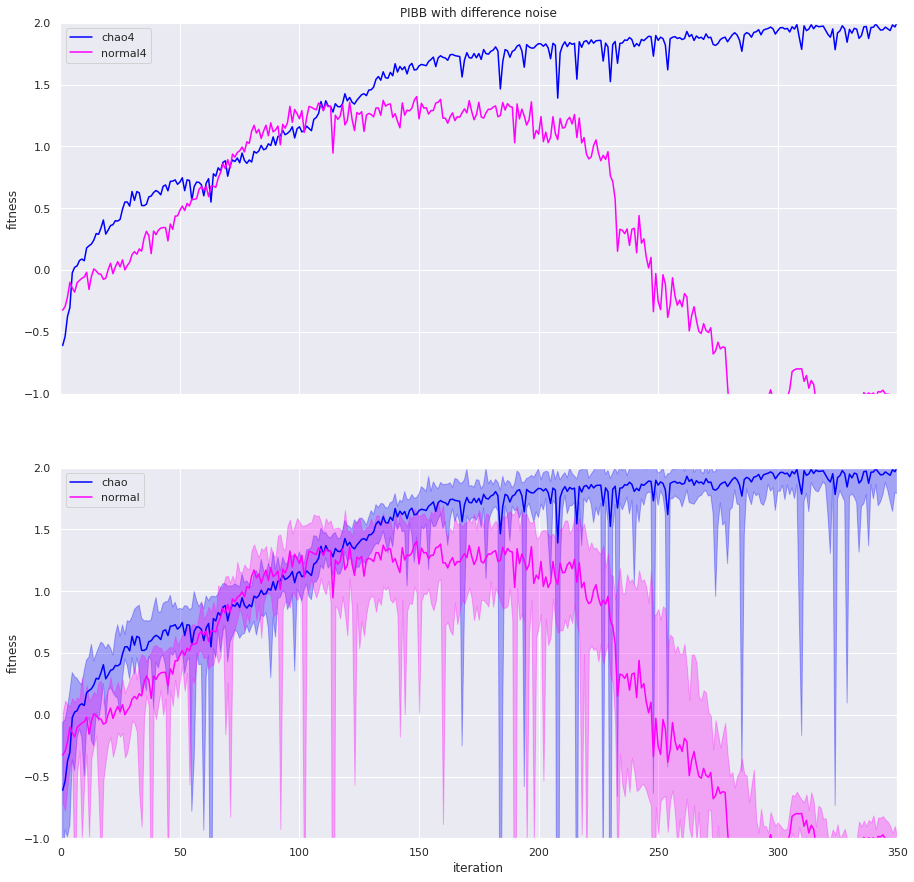

In [139]:
# === Lav plot ===

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,15))

# sit lables =
ax[0].set_title('PIBB with difference noise')
ax[1].set_xlabel('iteration')
ax[0].set_ylabel('fitness')
ax[1].set_ylabel('fitness')

temp_avg_set4 = 0
temp_min_set4 = 0
temp_max_set4 = 0
temp_avg_normal = 0
temp_min_normal = 0
temp_max_normal = 0

for i in range(init_set_nums,last_set_nums):
  ax[0].plot(x, globals()[f"y_avg_set4_{i}"], label=f'chao{i}', color='blue')
  ax[0].plot(x, globals()[f"y_avg_normal_{i}"], label=f'normal{i}', color='magenta')

  temp_avg_set4 = temp_avg_set4 + globals()[f"y_avg_set4_{i}"]
  temp_min_set4 = temp_min_set4 + globals()[f"y_min_set4_{i}"]
  temp_max_set4 = temp_max_set4 + globals()[f"y_max_set4_{i}"]

  temp_avg_normal = temp_avg_normal + globals()[f"y_avg_normal_{i}"]
  temp_min_normal = temp_min_normal + globals()[f"y_min_normal_{i}"]
  temp_max_normal = temp_max_normal + globals()[f"y_max_normal_{i}"]


ax[1].plot(x, temp_avg_set4/set_nums, label='chao', color='blue')
ax[1].plot(x, temp_avg_normal/set_nums, label='normal', color='magenta')

ax[1].fill_between(x, temp_min_set4/set_nums, temp_max_set4/set_nums, alpha=0.3, color='blue')
ax[1].fill_between(x, temp_min_normal/set_nums, temp_max_normal/set_nums, alpha=0.3, color='magenta')

# ax.legend(loc='best',labels=["chaotic","normal"])
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.ylim([-1.0, 2.0])
plt.xlim([0, 350])

# vis plot
plt.show()